# Verify Sample Dataset

In [15]:
import os
import numpy as np
import pandas as pd
import geopandas as gd
import seaborn as sns
import matplotlib.pyplot as plt
import webdataset as wds

from dotenv import load_dotenv

In [2]:
sns.set_style('darkgrid')

In [3]:
load_dotenv()

True

In [4]:
root = os.getenv('DATA_ROOT')

## Load Shape Files

In [5]:
ca_tiles = gd.read_file(f'{root}/shp/TILE_INDEX.shp/tile_index.shp')
ca_tiles = ca_tiles.sort_values(['row', 'col']).reset_index(drop=True)

In [6]:
world_shp = gd.read_file(f'{root}/shp/ne_10m/ne_10m_admin_1_states_provinces.shp')
ca = world_shp[world_shp.name.eq('California')]

## Gather Data

In [7]:
ds_train = (wds.WebDataset(f'file:{root}/dataset/poc/aerpoc-train-' + '{000000..000022}.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

In [8]:
ds_val = (wds.WebDataset(f'file:{root}/dataset/poc/aerpoc-val-' + '{000000..000007}.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

In [9]:
ds_test = (wds.WebDataset(f'file:{root}/dataset/poc/aerpoc-test-' + '{000000..000007}.tar', shardshuffle=False)
    .decode("pil")
    .to_tuple("jpg", "json"))

In [10]:
def get_sample_geo(sample) -> gd.GeoDataFrame:
    df = gd.GeoDataFrame.from_features(sample[1])
    df['color'] = np.array(sample[0]).mean() / 255
    return df

def get_geo_df(ds) -> gd.GeoDataFrame:
    return pd.concat([get_sample_geo(sample) for sample in ds])

In [13]:
train_df = get_geo_df(ds_train)
val_df = get_geo_df(ds_val)
test_df = get_geo_df(ds_test)

## View Sample Data

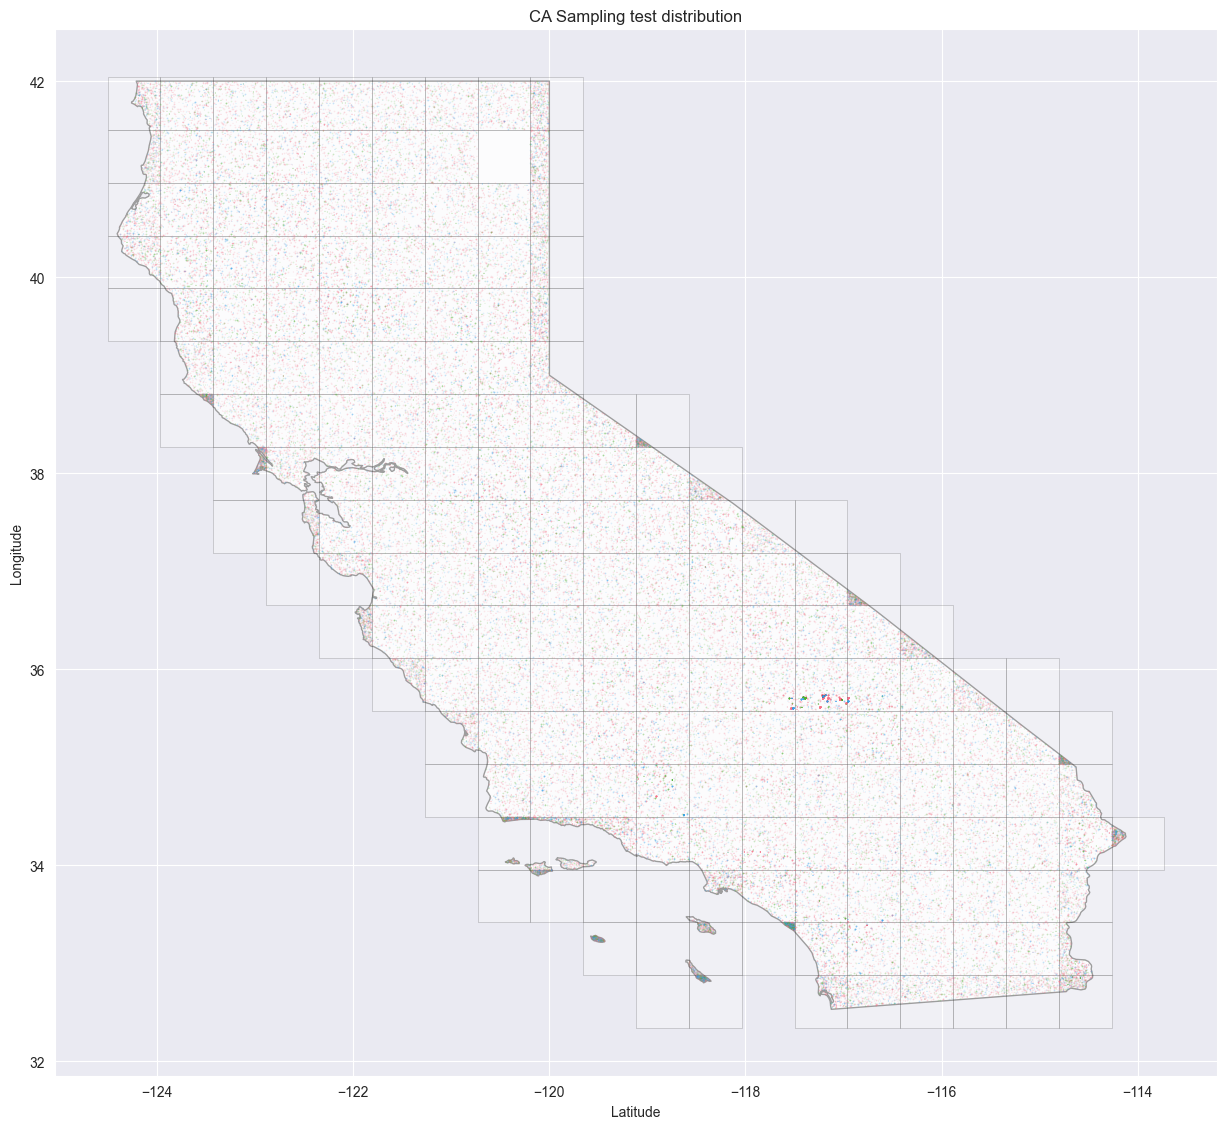

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

p_red = (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
p_blu = (0.23299120924703914, 0.639586552066035, 0.9260706093977744)
p_grn = (0.3126890019504329, 0.6928754610296064, 0.1923704830330379)

ca.plot(facecolor='white', ax=ax, edgecolor=".4", alpha=0.9)
ca_tiles.plot(facecolor='white', ax=ax, linewidth=0.4, edgecolor=".1", alpha=0.3)
#tile_gd.plot(column='tile', ax=ax, cmap='tab20c', linewidth=0.1, edgecolor=".1")
train_df.plot(facecolor="none", ax=ax, linewidth=0.2, edgecolor=p_red, alpha=0.3)
val_df.plot(facecolor="none", ax=ax, linewidth=0.2, edgecolor=p_grn, alpha=0.3)
test_df.plot(facecolor="none", ax=ax, linewidth=0.2, edgecolor=p_blu, alpha=0.3)
ax.set_title('CA Sampling test distribution')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

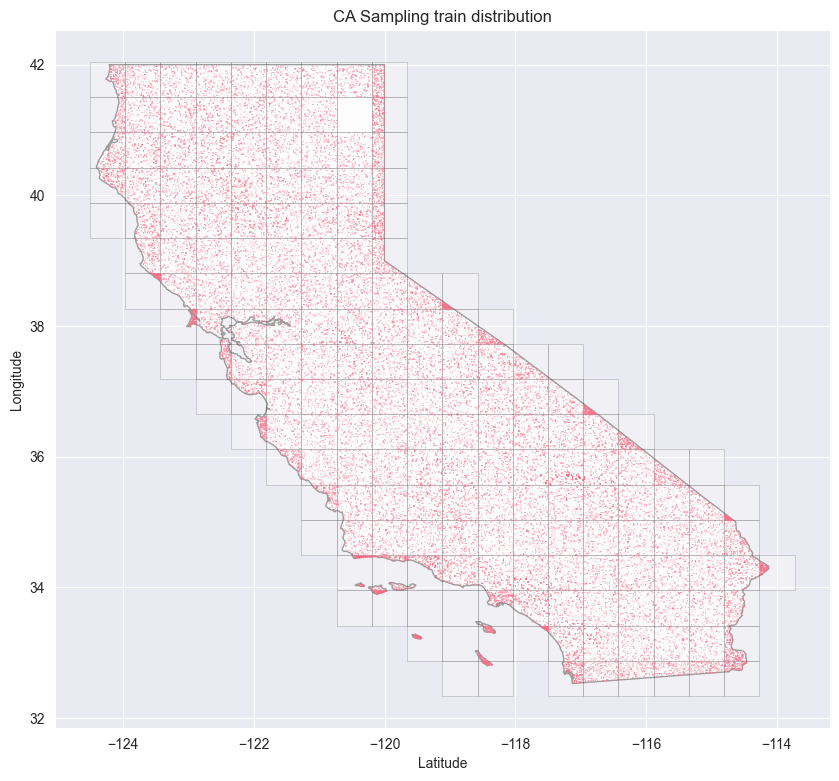

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ca.plot(facecolor='white', ax=ax, edgecolor=".4", alpha=0.9)
ca_tiles.plot(facecolor='white', ax=ax, linewidth=0.4, edgecolor=".1", alpha=0.3)
#tile_gd.plot(column='tile', ax=ax, cmap='tab20c', linewidth=0.1, edgecolor=".1")
train_df.plot(facecolor="none", ax=ax, linewidth=0.5, edgecolor=p_red, alpha=0.3)
ax.set_title('CA Sampling train distribution')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

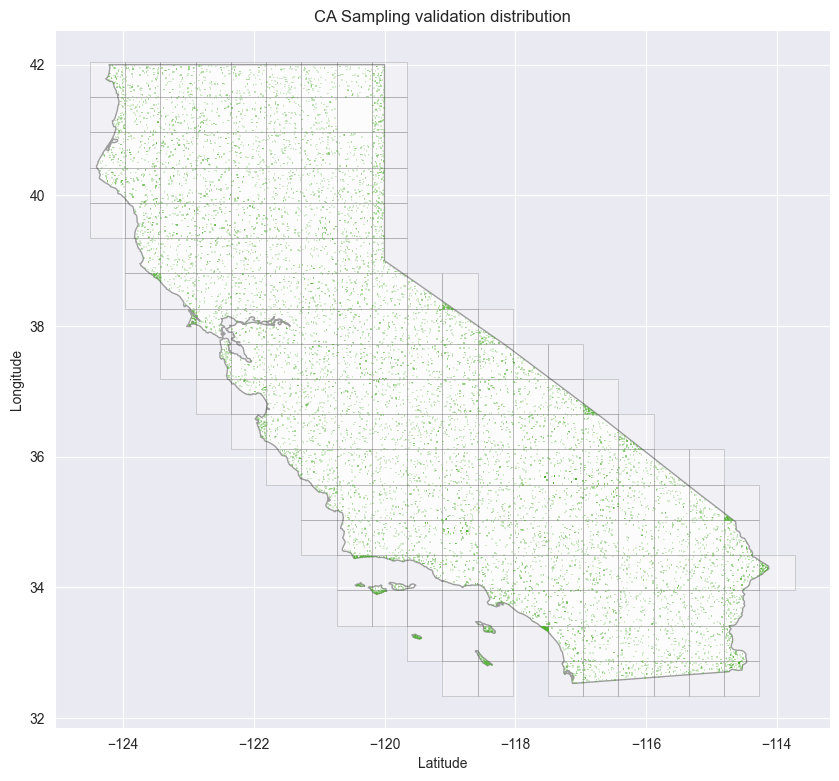

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ca.plot(facecolor='white', ax=ax, edgecolor=".4", alpha=0.9)
ca_tiles.plot(facecolor='white', ax=ax, linewidth=0.4, edgecolor=".1", alpha=0.3)
#tile_gd.plot(column='tile', ax=ax, cmap='tab20c', linewidth=0.1, edgecolor=".1")
val_df.plot(facecolor="none", ax=ax, linewidth=0.5, edgecolor=p_grn, alpha=0.3)
ax.set_title('CA Sampling validation distribution')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

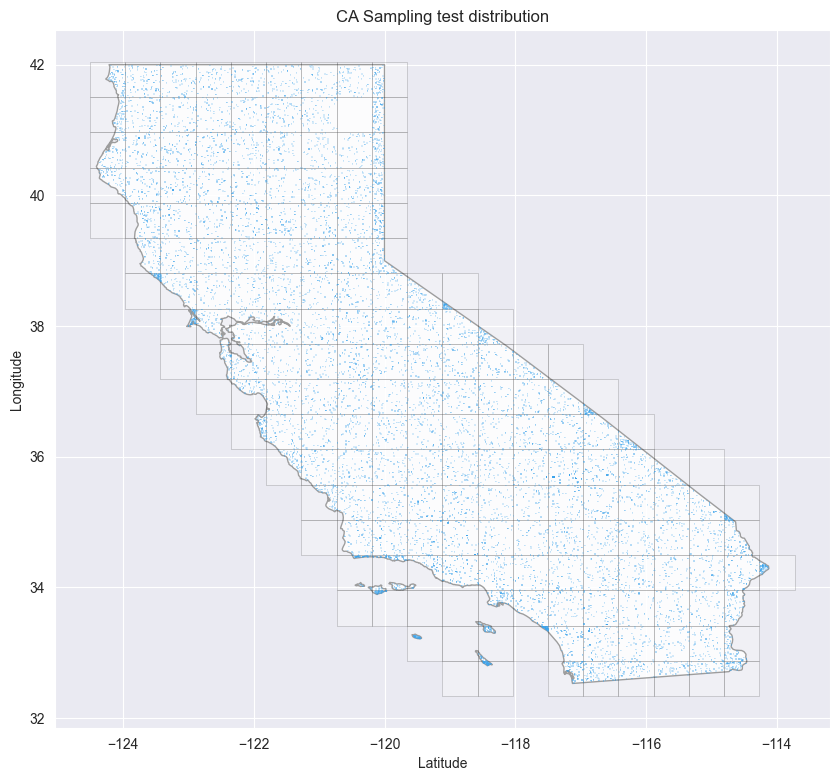

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ca.plot(facecolor='white', ax=ax, edgecolor=".4", alpha=0.9)
ca_tiles.plot(facecolor='white', ax=ax, linewidth=0.4, edgecolor=".1", alpha=0.3)
#tile_gd.plot(column='tile', ax=ax, cmap='tab20c', linewidth=0.1, edgecolor=".1")
test_df.plot(facecolor="none", ax=ax, linewidth=0.5, edgecolor=p_blu, alpha=0.3)
ax.set_title('CA Sampling test distribution')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

plt.show()

In [69]:
data = [
    train_df[['tile_id', 'color']],
    val_df[['tile_id', 'color']],
    test_df[['tile_id', 'color']]
]

avg_colors = (pd.concat(data)
    .groupby('tile_id')
    .mean()
    .reset_index())

ca_tiles = ca_tiles.merge(avg_colors, left_on='id', right_on='tile_id', how='left').drop(columns='tile_id')

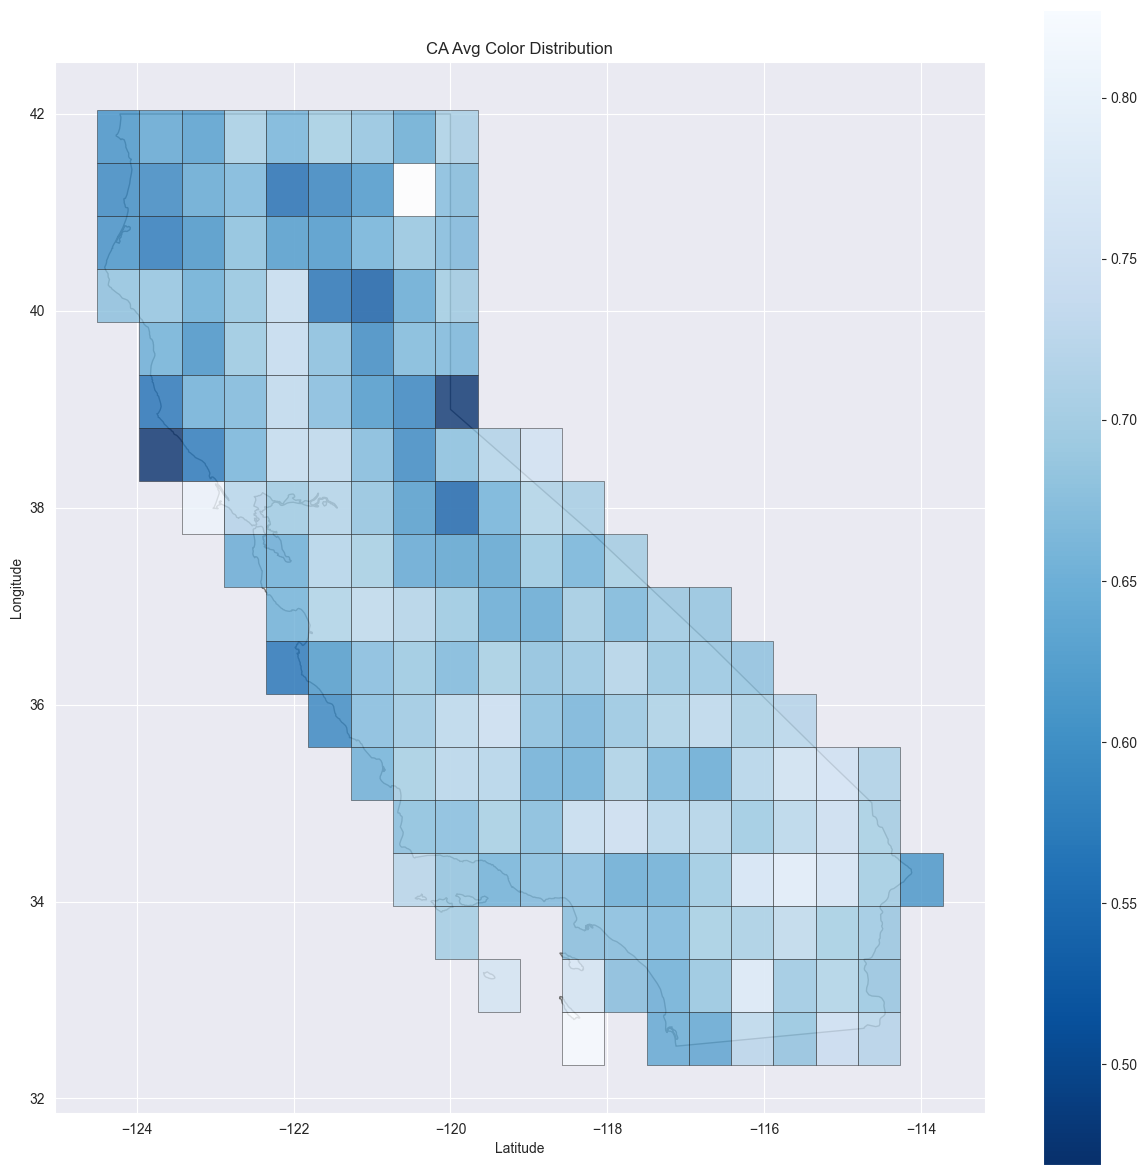

In [81]:
fig, ax = plt.subplots(figsize=(15, 15))

ca.plot(facecolor='white', ax=ax, edgecolor=".4", alpha=0.9)
ca_tiles.plot(column='color', cmap='Blues_r', ax=ax, linewidth=0.4, edgecolor=".1", alpha=0.8, legend=True)
ax.set_title('CA Avg Color Distribution')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()